In [1]:
import numpy as np
import opendatasets as od 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
dataset_url = 'https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks'
od.download('https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline

Skipping, found downloaded files in ".\spotify-dataset-19212020-600k-tracks" (use force=True to force download)


In [2]:
dataset = './spotify-dataset-19212020-600k-tracks'

In [3]:
os.listdir(dataset)

['artists.csv', 'dict_artists.json', 'tracks.csv']

In [4]:
track = pd.read_csv(dataset + '/tracks.csv')
artist = pd.read_csv(dataset + '/artists.csv')

In [5]:
print(type(dataset))

<class 'str'>


In [6]:
track.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [7]:
artist.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [8]:
track.shape

(586672, 20)

In [9]:
track.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [10]:
track.drop_duplicates(subset=['artists','name'],inplace = True)

In [11]:
track[track['name']=='Adore You']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
86217,5AnCLGg35ziFOloEnXK4uu,Adore You,71,278747,0,['Miley Cyrus'],['5YGY8feqx7naU7z4HrwZM6'],2013-10-04,0.583,0.655,0,-5.407,1,0.0315,0.1110,0.000004,0.113,0.201,119.759,4
91884,3jjujdWJ72nww5eGnfs2E7,Adore You,88,207133,0,['Harry Styles'],['6KImCVD70vtIoJWnq6nGn3'],2019-12-13,0.676,0.771,8,-3.675,1,0.0483,0.0237,0.000007,0.102,0.569,99.048,4


In [12]:
track.shape

(526610, 20)

In [13]:
track.drop_duplicates(subset=['artists','name'],inplace = True)


In [14]:
track.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,526610.000000,5.266100e+05,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000,526610.000000
mean,27.485676,2.295110e+05,0.044986,0.564123,0.540095,5.219557,-10.269805,0.657308,0.109139,0.452923,0.113000,0.214780,0.552379,118.410769,3.870257
std,18.312515,1.288433e+05,0.207273,0.166480,0.251820,3.518680,5.105035,0.474610,0.187529,0.347830,0.266417,0.185025,0.257930,29.822429,0.480705
min,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.737200e+05,0.000000,0.454000,0.341000,2.000000,-12.968000,0.000000,0.034100,0.101000,0.000000,0.098500,0.346000,95.478000,4.000000
50%,27.000000,2.141330e+05,0.000000,0.578000,0.546000,5.000000,-9.302000,1.000000,0.044600,0.430000,0.000023,0.139000,0.564000,117.234000,4.000000
75%,40.000000,2.635745e+05,0.000000,0.687000,0.746000,8.000000,-6.531000,1.000000,0.078200,0.786000,0.009250,0.279000,0.769000,136.389750,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [15]:
track.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

<Axes: xlabel='mode', ylabel='count'>

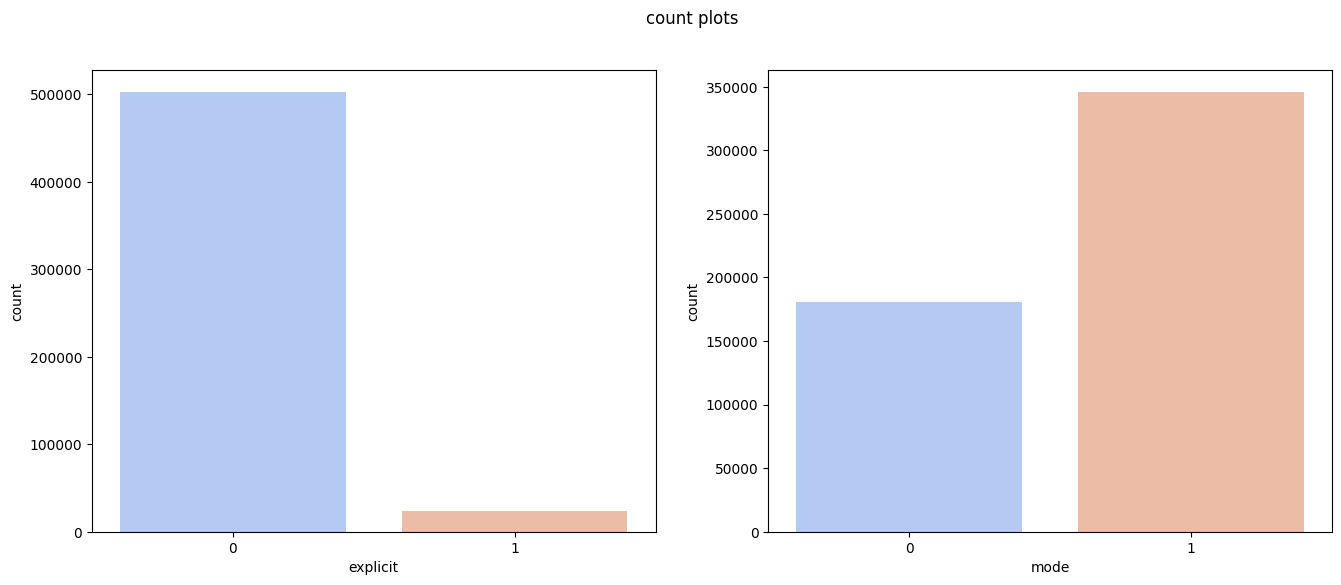

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('count plots')

sns.countplot(ax=axes[0],x='explicit',data=track,palette='coolwarm')
sns.countplot(ax=axes[1],x='mode',data=track,palette='coolwarm')

In [17]:
track['release_date'] = pd.to_datetime(track['release_date'], errors='coerce')
track['year'] = track['release_date'].apply(lambda time: time.year)


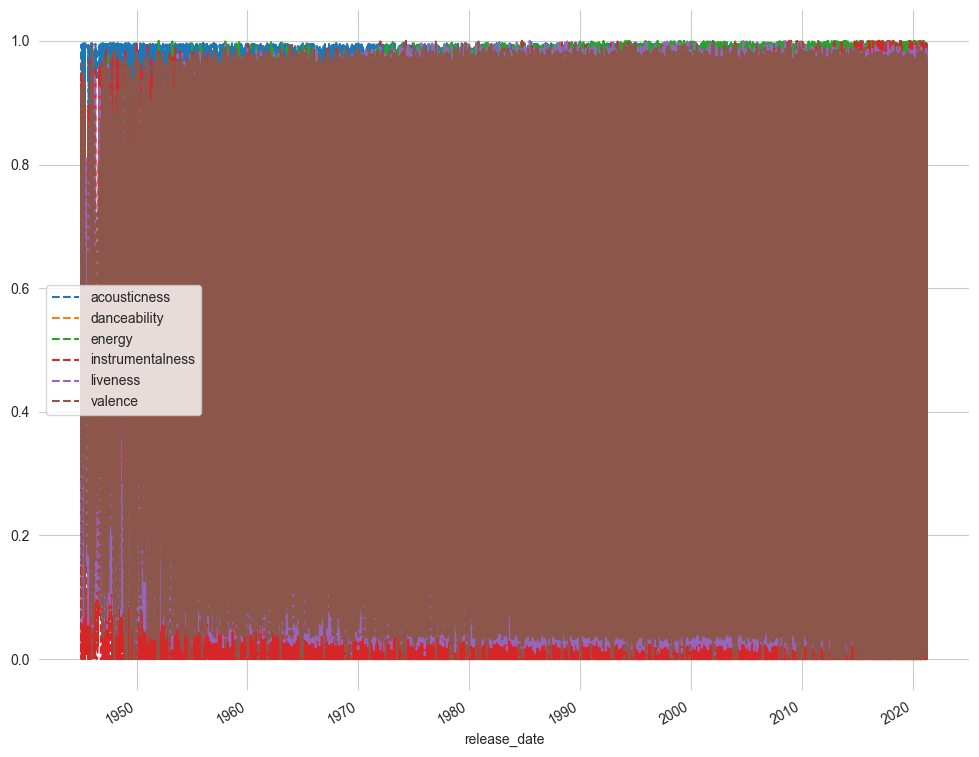

In [18]:
zerotoone = track[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'release_date']]
df = zerotoone.copy()
dfn = df[df['release_date'] > '1945-01-01']
dfn = dfn.reset_index(drop=True)
dfn.set_index('release_date', inplace=True)

sns.set_style('whitegrid')
dfn.plot(figsize=(12,10),style='--')
sns.despine(left=True, bottom=True)


<Axes: xlabel='popularity', ylabel='Count'>

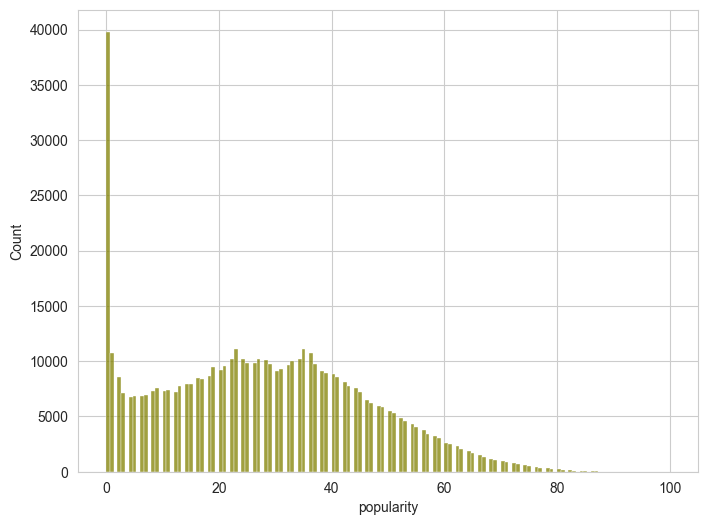

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(x='popularity',data=track,color="olive")

In [20]:
df = track[track['popularity']>85][['name','artists','popularity','year','time_signature']]
fig = px.scatter(df,x='year', y='popularity',color='name',size='time_signature')
import plotly
# plotly.offline.plot(fig, auto_open=True)

<Axes: >

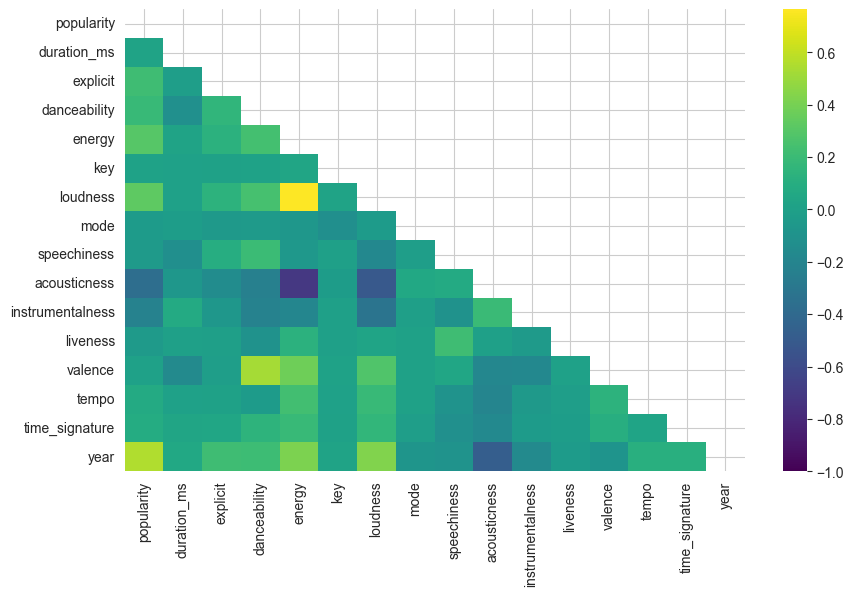

In [21]:
plt.figure(figsize=(10,6))
track_numeric = track.select_dtypes(include=np.number)
corr = track_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmin=-1, cmap='viridis', annot=False)



In [22]:
corr[abs(corr['popularity']) > 0.25]['popularity']

popularity      1.000000
energy          0.300280
loudness        0.325545
acousticness   -0.367837
year            0.557302
Name: popularity, dtype: float64

In [23]:
track['popularity'].describe()

count    526610.000000
mean         27.485676
std          18.312515
min           0.000000
25%          13.000000
50%          27.000000
75%          40.000000
max         100.000000
Name: popularity, dtype: float64

In [24]:
track.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],NaT,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,NaN


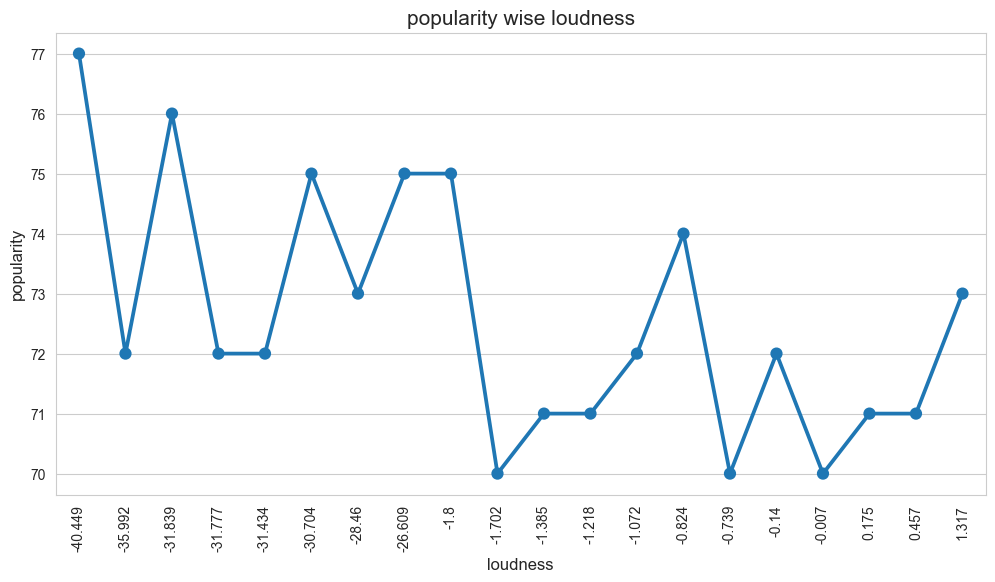

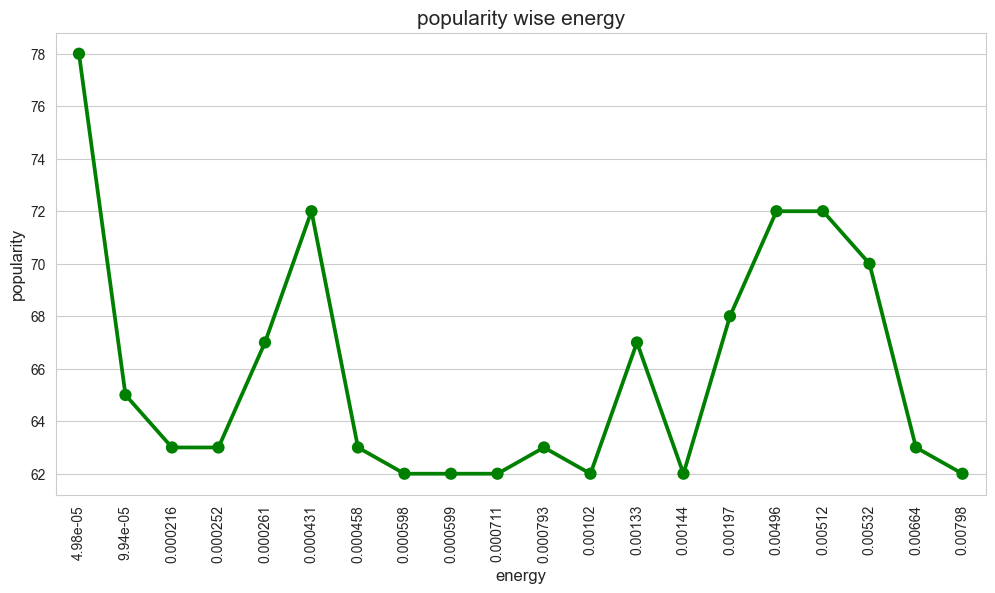

In [25]:
ld = track.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()
ac = track.groupby("acousticness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()
en = track.groupby("energy")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()
ins = track.groupby("instrumentalness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()



plt.figure(figsize=(12,6))
sns.pointplot(data=ld,x="loudness", y='popularity')#,ax=axes[0])
#, color=color[4])
plt.xlabel('loudness', fontsize=12)
plt.ylabel('popularity', fontsize=12)
plt.title("popularity wise loudness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,6))
sns.pointplot(data=en,x="energy", y='popularity',color='g')#,ax=axes[1])
#, color=color[4])
plt.xlabel('energy', fontsize=12)
plt.ylabel('popularity', fontsize=12)
plt.title("popularity wise energy", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [26]:
df = track.select_dtypes(np.number)
number_cols = list(df.columns)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X = scaler.fit_transform(df.values)

scaled_df = pd.DataFrame(scaled_X,
columns=df.columns)

In [28]:
df = df.fillna(df.mean())
scaled_df = scaled_df.fillna(scaled_df.mean())
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)





In [29]:
from sklearn import metrics
dict1 = {}

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=8, verbose=2)

In [32]:
kmeans.fit(pca_df)

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 500120.0730032161.
Iteration 1, inertia 452615.6292025811.
Iteration 2, inertia 446433.13663861394.
Iteration 3, inertia 443225.96823771944.
Iteration 4, inertia 440254.52131009.
Iteration 5, inertia 436811.0239719562.
Iteration 6, inertia 433004.04898568307.
Iteration 7, inertia 429397.6305071785.
Iteration 8, inertia 426500.2278754818.
Iteration 9, inertia 424395.87581794406.
Iteration 10, inertia 422866.72654660256.
Iteration 11, inertia 421754.83272329747.
Iteration 12, inertia 420932.0207609127.
Iteration 13, inertia 420296.43054712156.
Iteration 14, inertia 419784.9958665594.
Iteration 15, inertia 419352.4055387913.
Iteration 16, inertia 418982.5002260216.
Iteration 17, inertia 418666.39195753343.
Iteration 18, inertia 418389.9471577683.
Iteration 19, inertia 418150.7643403735.
Iteration 20, inertia 417955.3219850081.
Iteration 21, inertia 417793.09523562447.
Iteration 22, inertia 417661.4674596177.
Iteration 23, inertia 417565.7705656

KMeans(verbose=2)

In [33]:
spotify_dataKmeans = track.copy()
spotify_dataKmeans['cluster_label'] = kmeans.predict(pca_df)

In [34]:
x = metrics.calinski_harabasz_score(pca_df, spotify_dataKmeans['cluster_label'])
print(x)
#kmeans
dict1['kmeans']=x

396507.22037932073


In [35]:
from sklearn.cluster import Birch

In [36]:
brc = Birch(n_clusters=20)
brc.fit(pca_df)

Birch(n_clusters=20)

In [37]:
spotify_dataBrich = track.copy()
spotify_dataBrich['cluster_label'] = brc.predict(pca_df)

In [38]:
x = metrics.calinski_harabasz_score(pca_df, spotify_dataBrich['cluster_label'])
print(x) #BRICH
dict1['BRICH']=x

85047.6179943625


In [39]:
from sklearn.cluster import MiniBatchKMeans

In [40]:
minikmeans = MiniBatchKMeans(n_clusters=6,random_state=23,batch_size=32)

minikmeans.fit(pca_df)

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



MiniBatchKMeans(batch_size=32, n_clusters=6, random_state=23)

In [41]:
spotify_minikmeans = track.copy()
spotify_minikmeans['cluster_label'] = minikmeans.predict(pca_df)

In [42]:
x = metrics.calinski_harabasz_score(pca_df, spotify_minikmeans['cluster_label'])
print(x) #minibatch kmeans
dict1['minibatch kmeans']=x

385035.5831108452


In [43]:
from fcmeans import FCM

In [44]:
fcm = FCM(n_clusters=8)
fcm.fit(pca_df)

In [45]:
spotify_dataFuzzy = track.copy()
spotify_dataFuzzy['cluster_label'] = fcm.predict(pca_df)

In [46]:
x=metrics.calinski_harabasz_score(pca_df, spotify_dataFuzzy['cluster_label'])
print(x) #fuzzy c mean
dict1['fuzzy c']=x

391937.9360330082


In [47]:
from sklearn.mixture import GaussianMixture

In [48]:
gm = GaussianMixture(n_components=7, random_state=23)
gm.fit(pca_df)

GaussianMixture(n_components=7, random_state=23)

In [49]:
spotify_gm = track.copy()
spotify_gm['cluster_label'] = gm.predict(pca_df)

In [50]:
x=metrics.calinski_harabasz_score(pca_df, spotify_gm['cluster_label'])
print(x)
#Gausian Mixture
dict1['Gausian Mixture']=x

370137.5988994287


In [51]:
m = pd.DataFrame(list(dict1.items()),columns = ['cluster','score'])

In [52]:
m.set_index('cluster',inplace=True)
m

,score
cluster,
kmeans,396507.220379
BRICH,85047.617994
minibatch kmeans,385035.583111
fuzzy c,391937.936033
Gausian Mixture,370137.598899


In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict
from sklearn.impute import SimpleImputer

In [54]:
features = ['valence', 'year', 'acousticness',
            'danceability', 'duration_ms', 'energy',
            'explicit','instrumentalness', 'key', 
            'liveness', 'loudness', 'mode',
            'popularity','speechiness', 'tempo']

metadata_cols = ['year', 'name',  'artists']

In [83]:
song_cluster_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()), 
    ('kmeans', KMeans(n_clusters=8, verbose=2))
], verbose=True)

X = track[features]
song_cluster_pipeline.fit(X)


[Pipeline] ........... (step 1 of 3) Processing imputer, total=   0.3s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.2s


c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 7019814.425561479.
Iteration 1, inertia 5228329.142922537.
Iteration 2, inertia 5100128.718065218.
Iteration 3, inertia 5050610.234023997.
Iteration 4, inertia 5017273.937459661.
Iteration 5, inertia 4996089.664866988.
Iteration 6, inertia 4978610.000911424.
Iteration 7, inertia 4963654.859939217.
Iteration 8, inertia 4951680.916555905.
Iteration 9, inertia 4941624.253813727.
Iteration 10, inertia 4929610.855429711.
Iteration 11, inertia 4903691.791657439.
Iteration 12, inertia 4814850.190786358.
Iteration 13, inertia 4674914.911251508.
Iteration 14, inertia 4668071.6597656645.
Iteration 15, inertia 4664366.24513058.
Iteration 16, inertia 4661417.635399479.
Iteration 17, inertia 4659174.48079867.
Iteration 18, inertia 4657575.546604899.
Iteration 19, inertia 4656449.342574615.
Iteration 20, inertia 4655665.577757703.
Iteration 21, inertia 4655109.335874755.
Iteration 22, inertia 4654698.3966307705.
Iteration 23, inertia 4654391.856565582.
It

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('kmeans', KMeans(verbose=2))],
         verbose=True)

In [84]:
def input_preprocessor(song_list, track):
   
    song_vectors = []
    
    for song in song_list:
        try:
            song_data = track[(track['name'] == song['name']) & 
                                (track['year'] == song['year'])].iloc[0]
       
        except IndexError:
            song_data = None
            
        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song['name']))
            continue
            
        song_vectors.append(song_data[features].values)  

    return np.mean(np.array(list(song_vectors)), axis=0)

In [85]:
def tracks_groupby(song_list):
    """
    Groups a list of songs by artist and decade.
    """
    groupby_tracks = defaultdict(list)
    for song in song_list:
        artist = song['artist']
        decade = song['year'] // 10 * 10
        groupby_tracks[(artist, decade)].append(song)
    return groupby_tracks

In [86]:
def Music_Recommender(song_list, track, n_songs=10):

    #groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, track)
    
    
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(track[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    
    
    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    
    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = track.iloc[index]
  
    
    return rec_output[metadata_cols]

Results of Music_Recommender on 3 Hard-Coded Music Tracks

In [87]:
results =Music_Recommender([{'name': 'Toosie Slide', 'year': 2020},
                                          {'name': 'Outta Time (feat. Drake)', 'year': 2020},
                                          {'name': 'Chicago Freestyle (feat. Giveon)', 'year': 2020}],track)
results

c:\Python39\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SimpleImputer was fitted with feature names



,year,name,artists
337314,2020.0,LAST PIECE,['GOT7']
352745,2020.0,Se Te Nota,['Chema Rivas']
66456,1993.0,Fields Of Gold,['Sting']
530799,2017.0,Kangana,['Abeer Arora']
78488,2005.0,Ruler of Everything,['Tally Hall']
80248,2006.0,Beyaz Ve Sen,['Rober Hatemo']
305047,2018.0,Living,['Dierks Bentley']
399646,2019.0,La ragazza con il cuore di latta,['Irama']
531786,2020.0,Teri Meri Ladayi,"['Maninder Buttar', 'Akasa Singh']"
131847,2015.0,We Can't Stop,"['Boyce Avenue', 'Bea Miller']"
